# X-ray absorption spectroscopy (XAS)


In this notebook, you will use X-ray absorption data measured on Cr<sub>2</sub>O<sub>3</sub>. 

You will explore different aspects that need to be considered when performing data reduction for simple XAS measurements:  
- Locate the experimental files on disk.
- Visualize the contents of the files using an external program (PyMca, silx view).
- Find the indices of the scans and the counters for the x-axis, signal, and monitor.
- Explore the different ways to aggregate the scans, sum of fractions or fraction of sums.
- Explore the different ways to normalize the reduced signal: maximum or area.

<figure>
  <img src="assets/xas.png" alt="XAS" style="width:60%">
  <figcaption style="text-align: center; font-style: italic">J.K. Kowalska et al., Israel Journal of Chemistry 56, 803 (2016).</figcaption>
</figure>


# Import the required packages and set up logging

In [1]:
%matplotlib notebook

import sys
import logging

import numpy as np
import matplotlib.pyplot as plt

from daxs.measurements import Source, Xas

logging.basicConfig(level=logging.INFO, stream=sys.stdout)
logging.getLogger("daxs").setLevel(logging.INFO)

## Locate the experimental data using operating system commands

In [2]:
!ls experimental_data

ihch1515  ihch1527  ihch1531  ihma176  README.rst


## Define the data source and create the measurement

In [3]:
filename = "experimental_data/ihch1515/id26/Cr2O3_new/Cr2O3_new_0002/Cr2O3_new_0002.h5"
scan_ids = "4-23"
source = Source(filename=filename, inclusions=scan_ids)

counters = {"x": "hdh_energy", "signal": "det_dtc_apd", "monitor": "I02"}
measurement = Xas(source, counters)

## Plot the reduced data

<IPython.core.display.Javascript object>


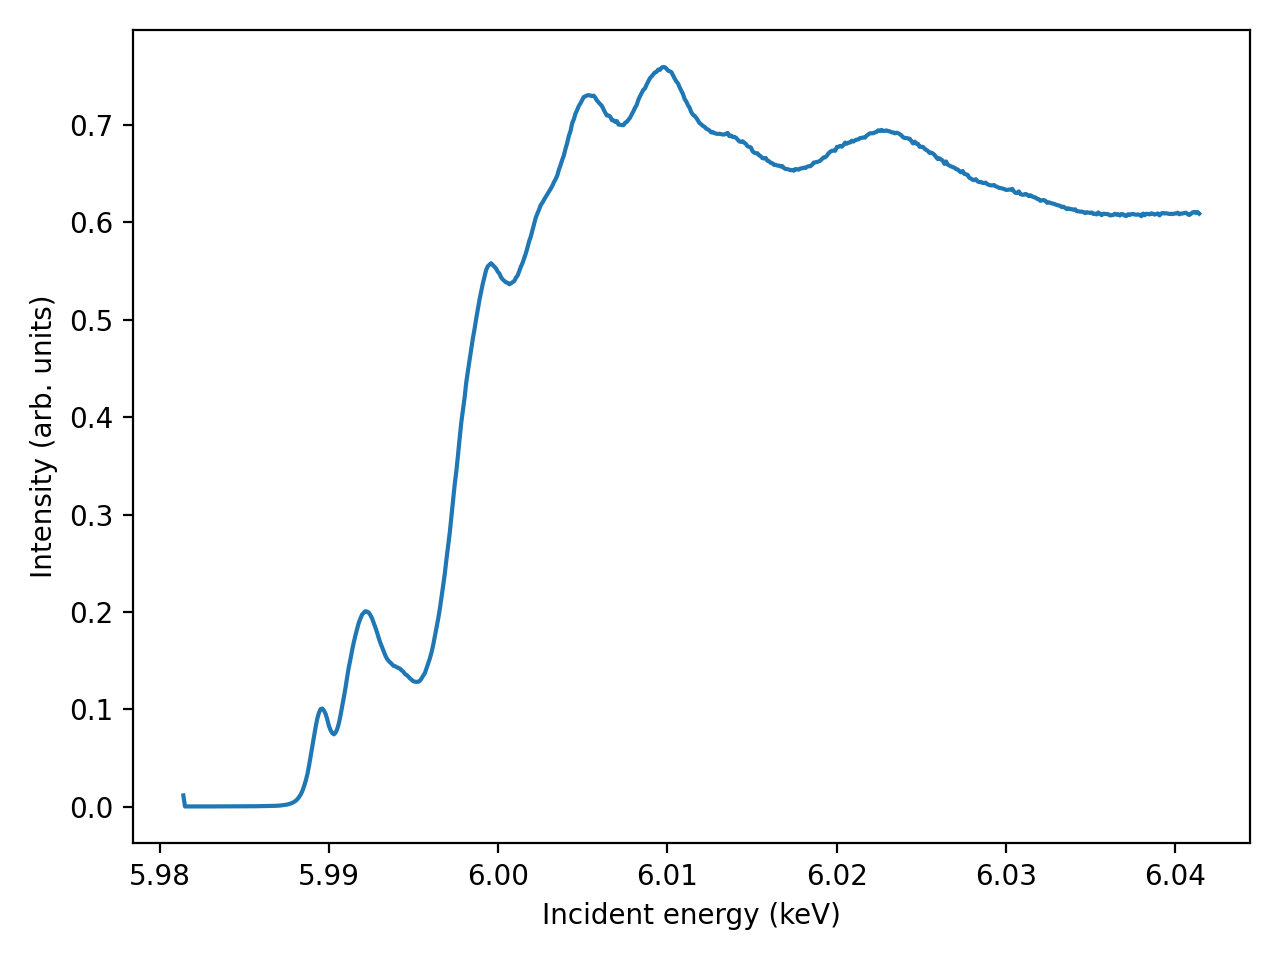

INFO:daxs.scans:Common X-axis parameters: min = 5.98140203, max = 6.04141146, step = 0.00009774, number of points = 615.
INFO:daxs.measurements:The scans data was aggregated using the fraction of sums mode.


In [4]:
fig, ax = plt.subplots()

ax.plot(measurement.x, measurement.signal)

ax.set_xlabel("Incident energy (keV)")
ax.set_ylabel("Intensity (arb. units)")

plt.tight_layout()

## Aggregation of multiple scans

Fraction of sums:
- $I_S = \frac{I_{S,1}(E)\ +\ I_{S,2}(E)\ +\ \cdots}{I_{M,1}(E)\ +\ I_{M,2}(E)\ +\ \cdots}$ 
- This may not correct well for instabilities in $I_M$.
   
Sum of fractions:
- $I_S = \frac{I_{S,1}(E)}{I_{M,1}(E)} + \frac{I_{S,2}(E)}{I_{M,2}(E)} + \cdots$ 
- This may not give the correct statistical weight between scans and lose the total counts.

<IPython.core.display.Javascript object>


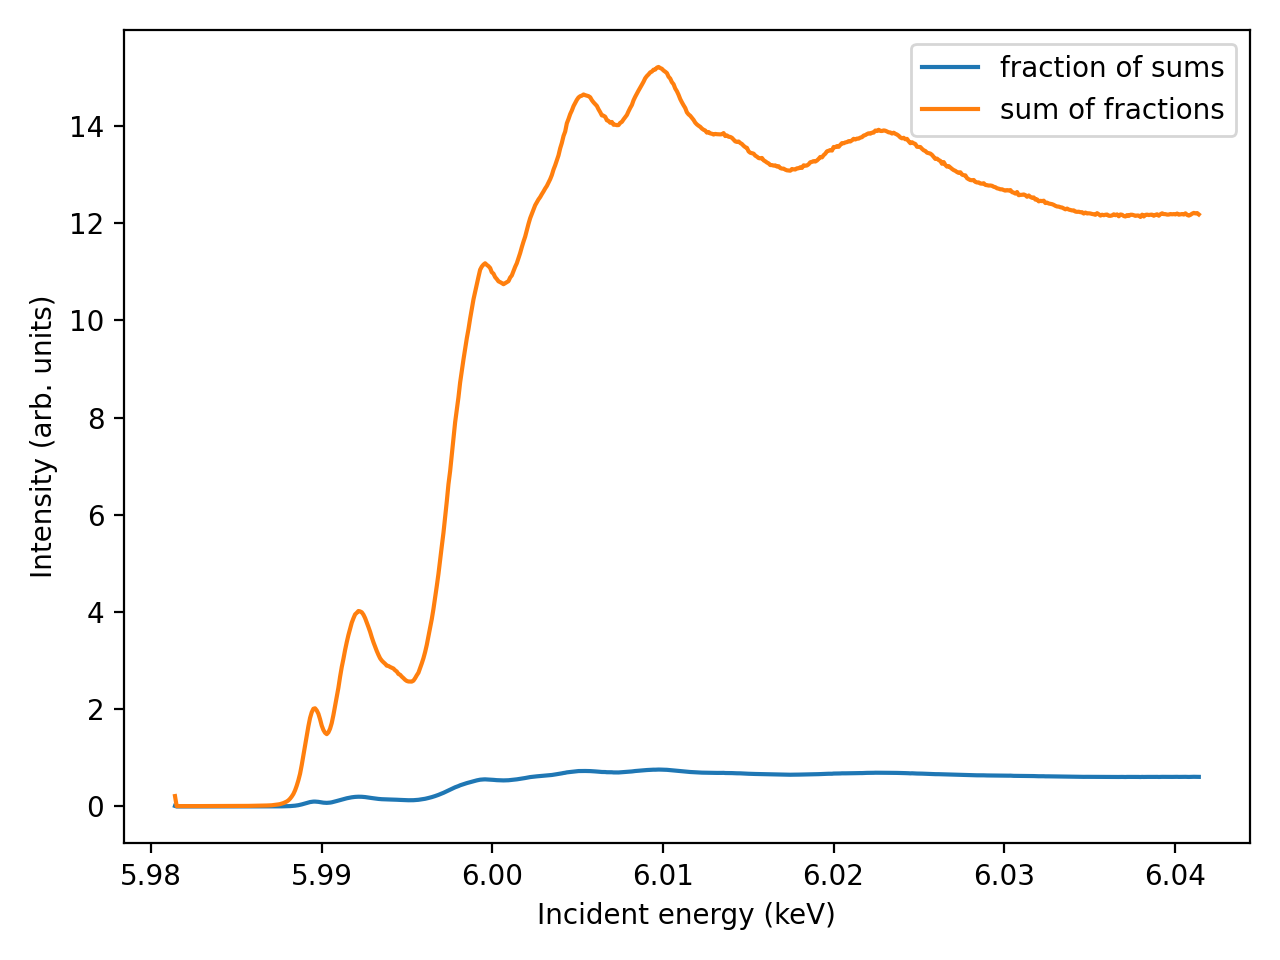

INFO:daxs.scans:Common X-axis parameters: min = 5.98140203, max = 6.04141146, step = 0.00009774, number of points = 615.
INFO:daxs.measurements:The scans data was aggregated using the sum of fractions mode.


In [5]:
fig, ax = plt.subplots()

ax.plot(measurement.x, measurement.signal, label="fraction of sums")

measurement.reset()
measurement.process(aggregation="sum of fractions")
ax.plot(measurement.x, measurement.signal, label="sum of fractions")

ax.legend()
ax.set_xlabel("Incident energy (keV)")
ax.set_ylabel("Intensity (arb. units)")

plt.tight_layout()

## Normalize the reduced data

<IPython.core.display.Javascript object>


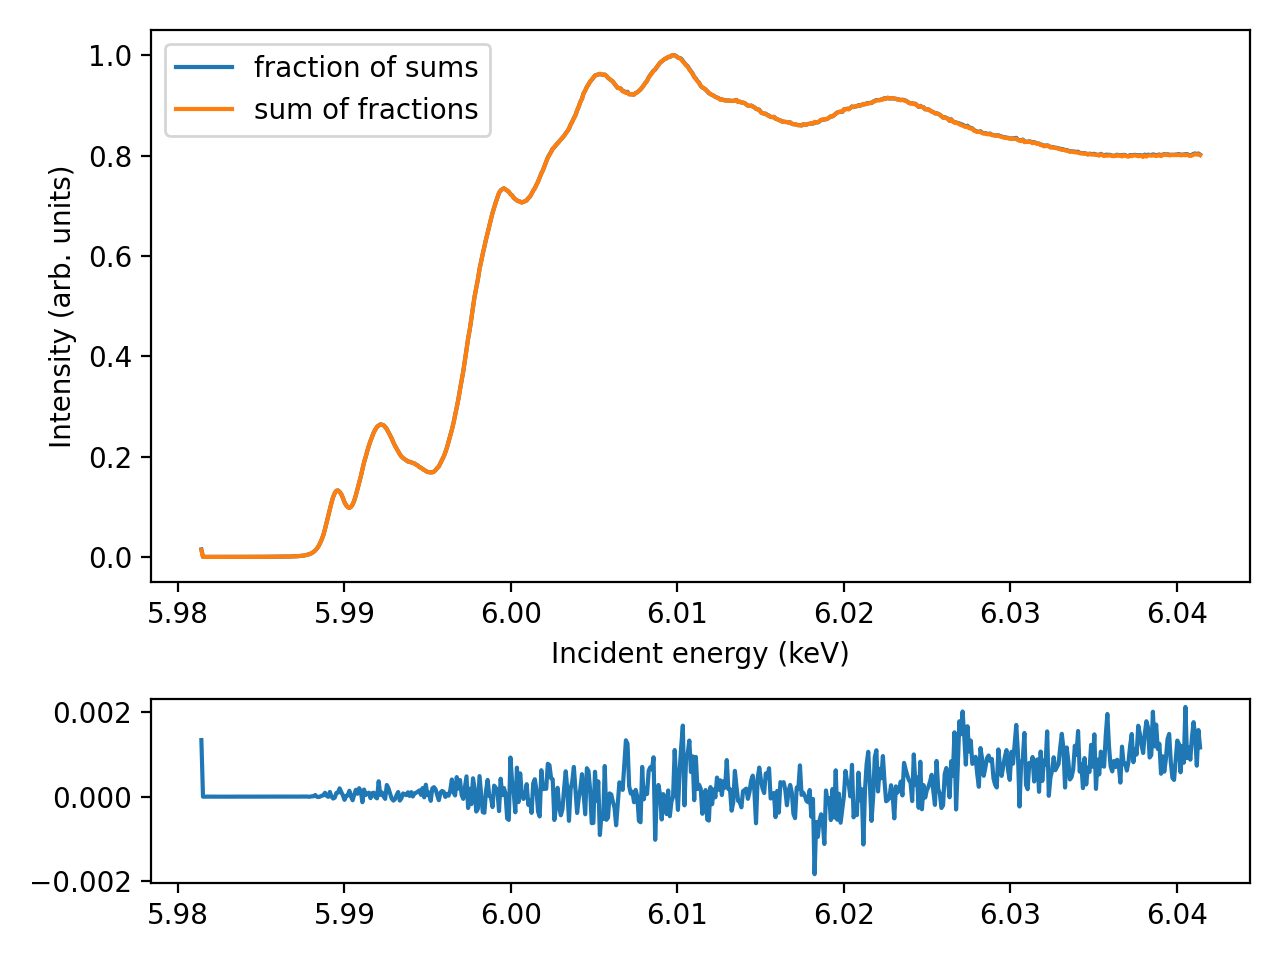

INFO:daxs.scans:Common X-axis parameters: min = 5.98140203, max = 6.04141146, step = 0.00009774, number of points = 615.
INFO:daxs.measurements:The scans data was aggregated using the fraction of sums mode.
INFO:daxs.measurements:The signal was normalized using the maximum.
INFO:daxs.scans:Common X-axis parameters: min = 5.98140203, max = 6.04141146, step = 0.00009774, number of points = 615.
INFO:daxs.measurements:The scans data was aggregated using the sum of fractions mode.
INFO:daxs.measurements:The signal was normalized using the maximum.


In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, gridspec_kw={"height_ratios": [3, 1]})

measurement.reset()
measurement.process(aggregation="fraction of sums", normalization="maximum")
ax1.plot(measurement.x, measurement.signal, label="fraction of sums")

# Save the data for the calculation of the difference signal.
x = np.copy(measurement.x)
signal_fos = np.copy(measurement.signal)

measurement.reset()
measurement.process(aggregation="sum of fractions", normalization="maximum")
ax1.plot(measurement.x, measurement.signal, label="sum of fractions")

# Save the data for the calculation of the difference signal.
signal_sof = np.copy(measurement.signal)

ax1.legend()
ax1.set_xlabel("Incident energy (keV)")
ax1.set_ylabel("Intensity (arb. units)")

# Plot the difference of the two signals.
ax2.plot(x, signal_fos - signal_sof)

plt.tight_layout()